/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in log


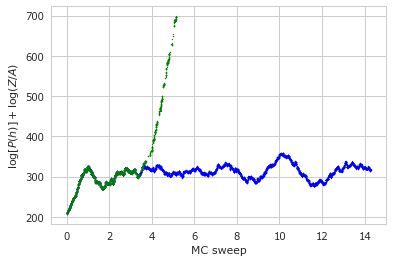

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

# To reproduce a plot that was previously made, uncomment the lines below and enter the
# simulation parameters

NSITES = 70
L = 10
beta = 1.
dt = 0.1
t = 1.
U = 5.
totalMCSweeps = 14

mainDir = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U))

data_to_reproduce = (mainDir + '/data-to-reproduce')

simulationParameters = np.loadtxt(data_to_reproduce + \
                                  '/simulationParameters_totalMCSweeps_' + \
                                  str(totalMCSweeps) + '.txt')

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = simulationParameters[3]
t = simulationParameters[4]
U = simulationParameters[5]
totalMCSweeps = int(simulationParameters[6])

# Load weights to plot

weightsNaive = np.loadtxt(data_to_reproduce + '/weightsNaive_' \
                          + 'totalMCSweeps_' + str(totalMCSweeps) + '.txt')

weightsUpdate = np.loadtxt(data_to_reproduce + '/weightsUpdate_' \
                          + 'totalMCSweeps_' + str(totalMCSweeps) + '.txt')

M = weightsNaive.size

time = np.arange(M)/NSITES/L   #measured in sweeps

sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
plt.scatter(time, np.log(weightsNaive), s = 1, color = 'b')
plt.scatter(time, np.log(weightsUpdate), s = 1, color = 'g')
plt.xlabel('MC sweep')
plt.ylabel(r'$\log [ P(h) ] + \log (Z/A)$')
plt.savefig(mainDir + '/weightsVsMCstep' + str(totalMCSweeps) + 'sweeps'
            + '.png', dpi = 600)